<a href="https://colab.research.google.com/github/abidshafee/DataScienceYouTubeTutorials/blob/master/PCA_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib import style
style.use('ggplot')

In [7]:
from google.colab import files
file = files.upload()

Saving datasets_Iris.csv to datasets_Iris.csv


Loading data into pandas datafeame


In [8]:
df = pd.read_csv('datasets_Iris.csv')

In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# PCA
### Let visualize 4D Data in 2D plot
PCA is not a machine learning algorithm, rather it is a technique we use to reduce the data dimention or the feature of dataset.

In [9]:
nm_df= df.iloc[:,1:5]

In [10]:
nm_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Converting Categorical Species column to Numeric values using scikit-learn label-encoder
 To use this numerical values as the value of c in scatter plot. Here c accept an array of sequence of number to colorcode the data points. 

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encodedOutput_Y = LabelEncoder()
df['Species'] = encodedOutput_Y.fit_transform(df.iloc[:,-1].values)

In [13]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


 - Iris-setosa = 0
 - Iris-Versicolor = 1
 - Iris-virginica = 2

The target output

In [30]:
Y = df.iloc[:,-1]

In [ ]:
Y

To prepare data for PCA we hve to scale it first

In [14]:
scalar = StandardScaler()
scalar.fit(nm_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scale_nm_df = scalar.transform(nm_df)

In [ ]:
scale_nm_df

### Now applying PCA on the scaled data

In [17]:
from sklearn.decomposition import PCA

In [18]:
pComponents = PCA(n_components=2)
# n_components = 2 means we want to reduce 4 dimentional data into 2 dimention

In [19]:
pComponents.fit(scale_nm_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
scale_nm_df.shape

(150, 4)

In [21]:
x_pComponent = pComponents.transform(scale_nm_df)

In [22]:
x_pComponent.shape

(150, 2)

In [ ]:
x_pComponent

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
================

In [34]:
# import matplotlib.patches as mpatches
# lg = ['Iris-setosa', 'Iris-Versicolor', 'Iris-virginica']
np.unique(Y)

array([0, 1, 2])

### Plotting the principle components

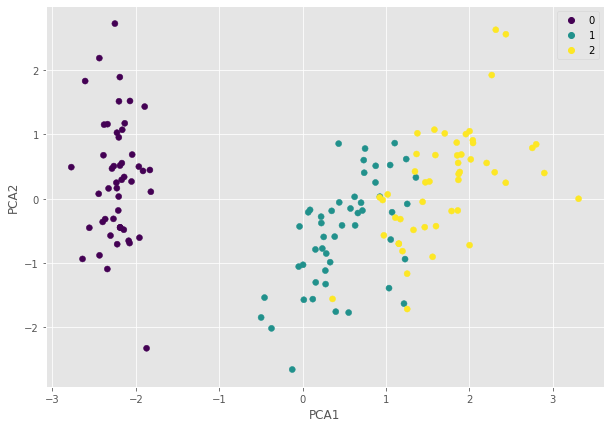

In [42]:
plt.figure(figsize=(10,7))
scatter = plt.scatter(x_pComponent[:,0], x_pComponent[:,1], c=Y)

# plt.legend(handles=['Iris-setosa', 'Iris-Versicolor', 'Iris-virginica'])
# plt.legend(('Iris-setosa', 'Iris-Versicolor', 'Iris-virginica'))
plt.xlabel('PCA1')
plt.ylabel('PCA2')

labels = np.unique(Y)
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels)

plt.show()